# SARIMA Model

(Sourced: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/)

The problem with plain **ARIMA model is it does not support seasonality**.

If your time series has defined seasonality, then, go for SARIMA which uses seasonal differencing.

Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, you subtract the value from previous season.

So, the model will be represented as **SARIMA(p,d,q)x(P,D,Q)**, where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series.

If your model has **well defined seasonal patterns, then enforce D=1** for a given frequency ‘x’.

Here’s some practical advice on building SARIMA model:

- As a general rule, set the model parameters such that **D never exceeds one**. 
- And the total differencing **‘d + D’ never exceeds 2**. 
- Try to keep only **either SAR or SMA terms** if your model has seasonal components.

## Import libraries

In [1]:
pip install pmdarima

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pm
plt.style.use("seaborn-whitegrid")

## Load data

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
data

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869
...,...
2008-02-01,21.654285
2008-03-01,18.264945
2008-04-01,23.107677


## Plot time series

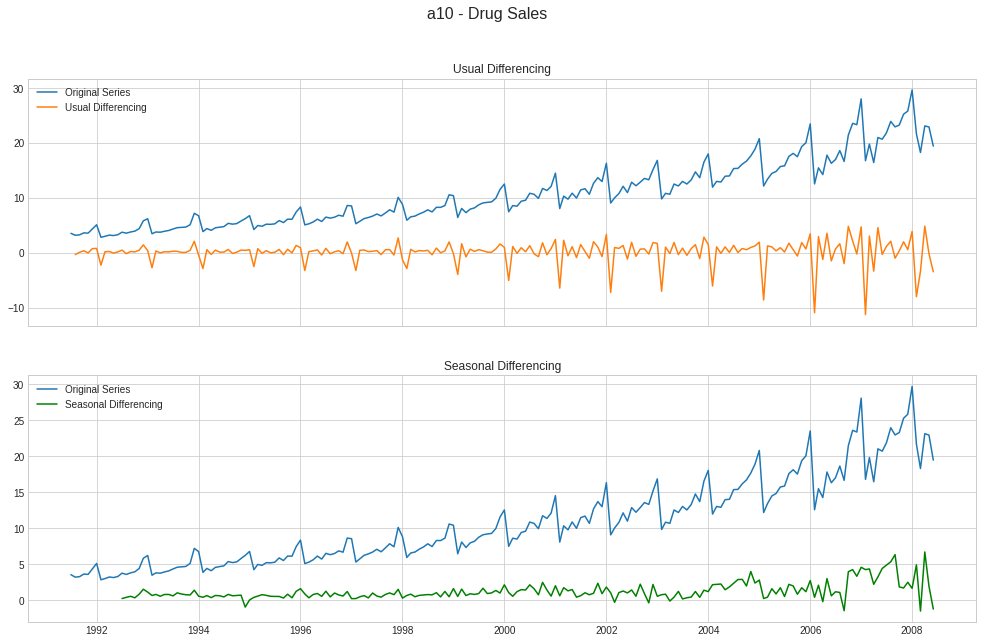

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(17,10), sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Differencing
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

As you can clearly see, the seasonal spikes is intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.

## Build SARIMA model

Let’s build the SARIMA model using `pmdarima`‘s `auto_arima()`. To do that, you need to set `seasonal=True`, set the frequency `m=12` for month wise series and enforce `D=1`

In [5]:
# Seasonal - fit stepwise auto-ARIMA (d, p, q) - (D, P, Q) - [m]
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=534.818, Time=1.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=624.061, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=596.068, Time=0.44 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=611.475, Time=0.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=757.274, Time=0.03 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=559.407, Time=0.27 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=536.817, Time=4.49 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=543.106, Time=1.16 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=537.559, Time=4.55 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=594.467, Time=0.32 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=529.829, Time=1.16 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=555.198, Time=0.33 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.28 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -254.030
Date:                            Wed, 18 Aug 2021   AIC                            524.060
Time:                                    07:52:42   BIC                            550.120
Sample:                                         0   HQIC                           534.615
                                            - 204                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0052      0.009      0.564      0.573      -0.013       0.023
ar.L1          0.9757      0.018     52.828      0.000       0.939       1.012
ma.L1         -0.8963      0.056    -15.948      0.000      -1.006      -0.786
ma.L2          0.2059      0.058      3.578      0.000       0.093       0.319
ar.S.L12       0.8440      0.174      4.852      0.000       0.503       1.185
ma.S.L12      -1.5566      0.192     -8.097      0.000      -1.933      -1.180
ma.S.L24       0.7293      0.113      6.437      0.000       0.507       0.951
sigma2         0.7549      0.063     12.065      0.000       0.632       0.878
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               142.52
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):              14.49   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model has estimated the AIC and the P values of the coefficients look significant. Let’s look at the residual diagnostics plot.

The best model SARIMAX(3, 0, 0)x(0, 1, 1, 12) has an AIC of 528.6 and the P Values are significant.

Let’s forecast for the next 24 months.

## Make Forecast

In [6]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

In [7]:
# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

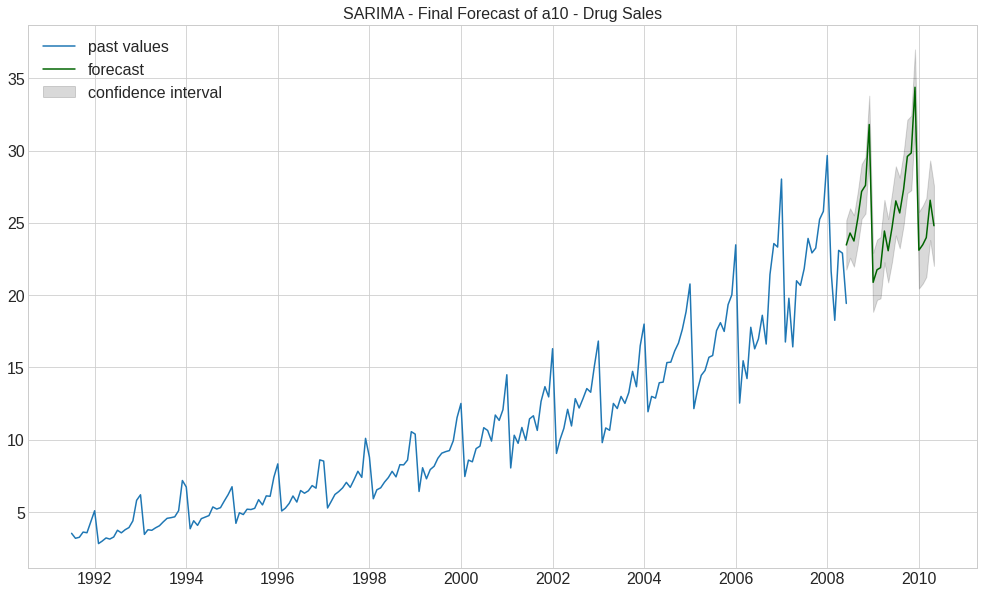

In [8]:
# Plot
plt.figure(figsize=(17,10))
plt.plot(data, label="past values")
plt.plot(fitted_series, color='darkgreen', label="forecast")
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15, label="confidence interval")

plt.title("SARIMA - Final Forecast of a10 - Drug Sales", fontsize=16)
plt.legend(loc='upper left', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

There you have a nice forecast that captures the expected seasonal demand pattern.